### Prepare graph data

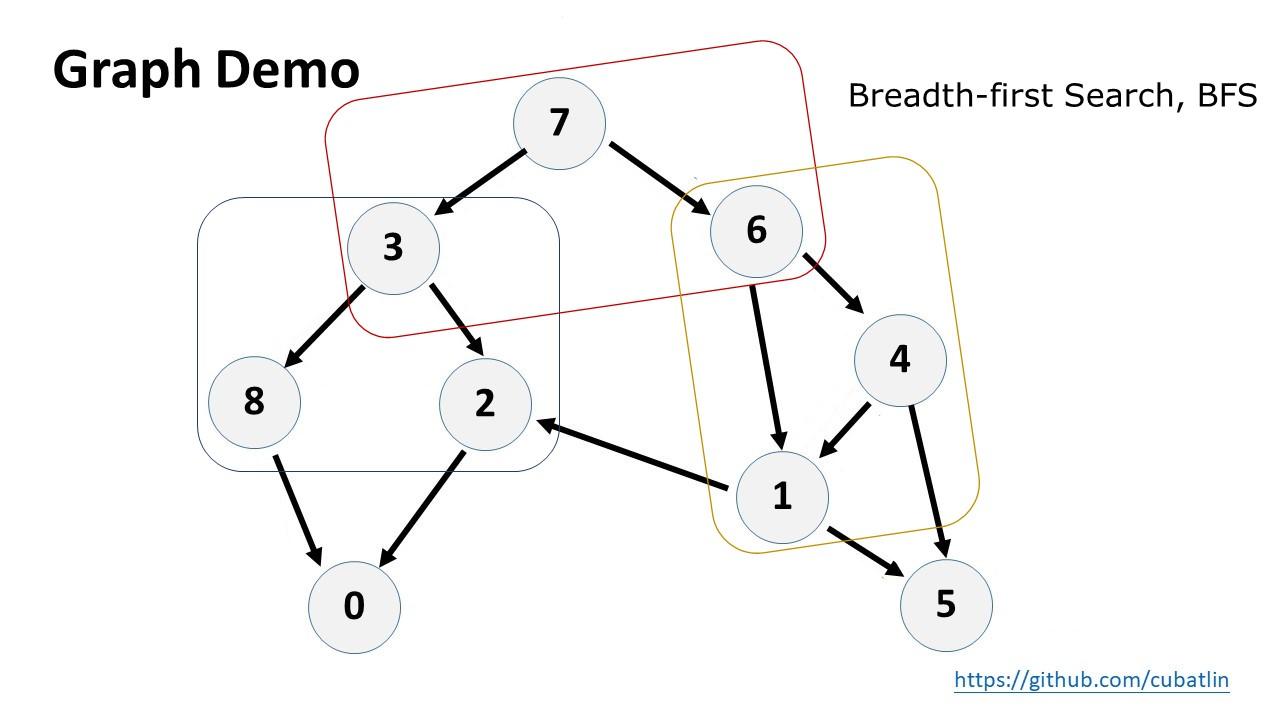

In [16]:
from IPython.display import Image
Image("BFS.jpg", width=850)

In [1]:
%reset -f
import pandas as pd
from collections import deque
import numpy as np

c1 = [7,7,3,3,8,2,6,6,4,4,1,1]
c2 = [3,6,8,2,0,0,4,1,1,5,5,2]
 
data_array = np.vstack((c1,c2)).T
del c1 ,c2

In [2]:
data_array

array([[7, 3],
       [7, 6],
       [3, 8],
       [3, 2],
       [8, 0],
       [2, 0],
       [6, 4],
       [6, 1],
       [4, 1],
       [4, 5],
       [1, 5],
       [1, 2]])

#### Adjency List, Adjency direct list, Adjacency redirect list

In [6]:
#Prepare Graph data
Adj_List = [[] for i in  range(data_array.max()+1)]#無向圖  
Adj_DList = [[] for i in  range(data_array.max()+1)]#有向圖
Adj_RDList = [[] for i in  range(data_array.max()+1)]#反向圖

for i,j in data_array:
    Adj_List[i].append(j);Adj_List[j].append(i)
    Adj_DList[i].append(j)
    Adj_RDList[j].append(i)

In [7]:
#Initial 
visit_time = np.zeros(data_array.max()+1) # 紀錄in的時間點
visit_out = np.zeros(data_array.max()+1) # 紀錄out的時間點
visit_point = [] # 紀錄遍歷順序
t=0
tmp_dqe = deque()

#### Type 1-1: try&except + Subtree

In [5]:
def BFS(x,Adj):
    if visit_time[x]!=0:
        return
    global t
    print("------------")
    print("Now:" +str(x))
    visit_point.append(x)
    print("visit_point:" +str(visit_point))
    t+=1;visit_time[x]=t #為x
    for y in Adj[x]: 
        tmp_dqe.append(y)
    print("deque:" + str(tmp_dqe) )
    while True:
        try:
            BFS(tmp_dqe.popleft(),Adj)
        except IndexError:
            break
            
BFS(7,Adj_DList)

------------
Now:7
visit_point:[7]
deque:deque([3, 6])
------------
Now:3
visit_point:[7, 3]
deque:deque([6, 8, 2])
------------
Now:6
visit_point:[7, 3, 6]
deque:deque([8, 2, 4, 1])
------------
Now:8
visit_point:[7, 3, 6, 8]
deque:deque([2, 4, 1, 0])
------------
Now:2
visit_point:[7, 3, 6, 8, 2]
deque:deque([4, 1, 0, 0])
------------
Now:4
visit_point:[7, 3, 6, 8, 2, 4]
deque:deque([1, 0, 0, 1, 5])
------------
Now:1
visit_point:[7, 3, 6, 8, 2, 4, 1]
deque:deque([0, 0, 1, 5, 5, 2])
------------
Now:0
visit_point:[7, 3, 6, 8, 2, 4, 1, 0]
deque:deque([0, 1, 5, 5, 2])
------------
Now:5
visit_point:[7, 3, 6, 8, 2, 4, 1, 0, 5]
deque:deque([5, 2])


#### Type 1-2: len condition

In [8]:
def BFS(x,Adj):
    if visit_time[x]!=0:
        print("Now Dropping: "+ str(x))
        return
    global t
    print("------------")
    print("Now:" +str(x))
    visit_point.append(x)
    print("visit_point:" +str(visit_point))
    t+=1;visit_time[x]=t #為x
    for y in Adj[x]: 
        tmp_dqe.append(y)
    print("deque:" + str(tmp_dqe) )
    while len(tmp_dqe)>0:
        BFS(tmp_dqe.popleft(),Adj)
            
BFS(7,Adj_DList)

------------
Now:7
visit_point:[7]
deque:deque([3, 6])
------------
Now:3
visit_point:[7, 3]
deque:deque([6, 8, 2])
------------
Now:6
visit_point:[7, 3, 6]
deque:deque([8, 2, 4, 1])
------------
Now:8
visit_point:[7, 3, 6, 8]
deque:deque([2, 4, 1, 0])
------------
Now:2
visit_point:[7, 3, 6, 8, 2]
deque:deque([4, 1, 0, 0])
------------
Now:4
visit_point:[7, 3, 6, 8, 2, 4]
deque:deque([1, 0, 0, 1, 5])
------------
Now:1
visit_point:[7, 3, 6, 8, 2, 4, 1]
deque:deque([0, 0, 1, 5, 5, 2])
------------
Now:0
visit_point:[7, 3, 6, 8, 2, 4, 1, 0]
deque:deque([0, 1, 5, 5, 2])
Now Dropping: 0
Now Dropping: 1
------------
Now:5
visit_point:[7, 3, 6, 8, 2, 4, 1, 0, 5]
deque:deque([5, 2])
Now Dropping: 5
Now Dropping: 2


#### Type 2: While FIFO (by PatWu)

In [13]:
#Initial 
visit_time = np.zeros(data_array.max()+1) # 紀錄in的時間點
visit_out = np.zeros(data_array.max()+1) # 紀錄out的時間點
visit_point = [] # 紀錄遍歷順序

In [14]:
def BFS_Pat(root,adj_,vt_):
    #initial
    t=1;dqe_ = deque()
    dqe_.append(root) 
    
    while len(dqe_)>0:
        
        x = dqe_.popleft()
        visit_point.append(x)
                
        for y in adj_[x]:
            if vt_[y] == 0:
                print("Now: "+ str(y) )
                dqe_.append(y)
                vt_[y]=t;t+=1
        print("Now dqe_: "+ str(dqe_))
        print("-------------")

In [15]:
BFS_Pat(7,Adj_DList,visit_time)

Now: 3
Now: 6
Now dqe_: deque([3, 6])
-------------
Now: 8
Now: 2
Now dqe_: deque([6, 8, 2])
-------------
Now: 4
Now: 1
Now dqe_: deque([8, 2, 4, 1])
-------------
Now: 0
Now dqe_: deque([2, 4, 1, 0])
-------------
Now dqe_: deque([4, 1, 0])
-------------
Now: 5
Now dqe_: deque([1, 0, 5])
-------------
Now dqe_: deque([0, 5])
-------------
Now dqe_: deque([5])
-------------
Now dqe_: deque([])
-------------
